In [2]:
import numpy as np
import pandas as pd
import scipy as sc
import re

## Day 15

In [45]:
puzzle_input = [2,0,1,7,4,14,18]

### Part A

In [46]:
def idx_of_last_occurance(puzzle, last_idx):
    
    last = puzzle[last_idx]
    
    idx  = last_idx - 1
    while puzzle[idx] != last:
        if idx == 0:
            return last_idx
        idx -= 1
        
    return idx


puzzle_length = 2020

puzzle = puzzle_input + [0]*(puzzle_length - len(puzzle_input))

last_idx = len(puzzle_input)-1
while last_idx < puzzle_length-1:
    puzzle[last_idx+1] = last_idx - idx_of_last_occurance(puzzle, last_idx)
    last_idx += 1
    
answer15A = puzzle[-1]
print('answer 15A:', answer15A, len(puzzle))

answer 15A: 496 2020


### Part B

Same as A, but now for a much longer higher number N. This depends quadratically on N. THerefore, we will use a lookup table: number -> index of last occurance for the first 100 numbers

In [23]:
class LookupTable:
    
    def __init__(self, size):
        
        self.lookup = [-1]*size
        self.size = size
        
    def get_last_occ_idx(self, n):
        if n < self.size:
            return self.lookup[n]
        else:
            return -1
        
    def set_last_occ_idx(self, n, idx):
        if n < self.size:
            self.lookup[n] = idx
            

def idx_of_last_occurance(puzzle, last_idx, lookup):
    
    last = puzzle[last_idx]
    
    if lookup.get_last_occ_idx(last):
        return idx
    
    idx  = last_idx - 1
    while puzzle[idx] != last:
        if idx == 0:
            return last_idx
        idx -= 1
        
    return idx

In [79]:
puzzle_length = 30000000
#puzzle_length = 2020
#lookup_size = 100
#lookup = LookupTable(lookup_size)
value_to_last_index = [0]*puzzle_length
for idx, p in enumerate(puzzle_input[:-1]):
    value_to_last_index[p] = idx

In [83]:
value_to_last_index = [-1]*puzzle_length
for idx, p in enumerate(puzzle_input[:-1]):
    value_to_last_index[p] = idx

last_idx = len(puzzle_input)-1
last_val = puzzle_input[-1]
prev_val = -1
while last_idx < puzzle_length-1:
    
    #print(last_idx, last_val, prev_val)
    
    prev_val = last_val
    last_occ_idx = value_to_last_index[last_val]
    if last_occ_idx == -1:
        last_val = 0
    else:
        last_val = last_idx - last_occ_idx

    value_to_last_index[prev_val] = last_idx
 
    last_idx += 1
    if last_idx%1000000==0:
        print('last_idx:', last_idx/1000000, end='\n')
    
answer15B = last_val
print('\nanswer 15B:', answer15B)

last_idx: 1.0
last_idx: 2.0
last_idx: 3.0
last_idx: 4.0
last_idx: 5.0
last_idx: 6.0
last_idx: 7.0
last_idx: 8.0
last_idx: 9.0
last_idx: 10.0
last_idx: 11.0
last_idx: 12.0
last_idx: 13.0
last_idx: 14.0
last_idx: 15.0
last_idx: 16.0
last_idx: 17.0
last_idx: 18.0
last_idx: 19.0
last_idx: 20.0
last_idx: 21.0
last_idx: 22.0
last_idx: 23.0
last_idx: 24.0
last_idx: 25.0
last_idx: 26.0
last_idx: 27.0
last_idx: 28.0
last_idx: 29.0

answer 15B: 883


#### Analysis of occurance of numbers in the puzzle list

In [8]:
from collections import Counter
d = dict(Counter(puzzle[:last_idx]))

In [9]:
sorted_idx = np.argsort(-1*np.array(list(d.values())))
sorted_counts = np.array(list(d.values()))[sorted_idx]
sorted_values = np.array(list(d.keys()))[sorted_idx]

In [13]:
sorted_counts[:20]

array([4928, 1899, 1551, 1096,  910,  737,  719,  371,  328,  298,  255,
        244,  237,  222,  209,  200,  163,  158,  147,  146])

In [12]:
sorted_values[:20]

array([ 0,  5,  6,  7,  1,  4,  8,  9, 11,  2, 12, 18, 10, 19, 13, 14, 17,
       16, 15, 20])

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt


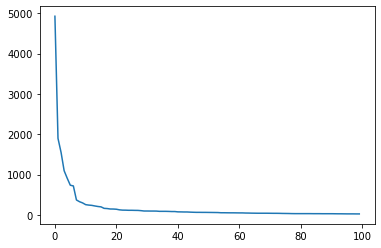

In [17]:
plt.plot(sorted_counts[:100])

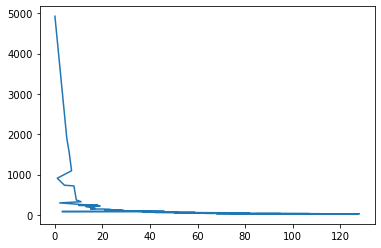

In [18]:
plt.plot(sorted_values[:100], sorted_counts[:100])